### 1. Import Libraries

In [1]:
import pandas as pd # to work with dataframe
import numpy as np # to work on maths calculations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns  # for data visualization

### 2. Load Data

In [2]:
# Load csv to dataframe
# Setting 'low_memory = False' to avoid error message. 
# The error is due to mix datatype of columns. 
# Pandas tries to identify the datatype for each columns which damands lot of memory.

df_loan  = pd.read_csv(r'C:\Users\jk507e\Downloads\loan\loan.csv',low_memory=False)

### 3. Understand the Data

In [3]:
df_loan.head()

# The data has information about loan, amount of loans, tenure, interest rate and installments.
# It has other information like verificaiton status, and whats the status of loan at present whether it is paid fully, ongoing 
# or charged off.
# If has other behavioral data of the customer and mostly NA

# Que: What could be the driving affects in loan becoming default?

# Que: Does highter loan amount becomes burden to customer and defaults or is lesser loan amount means, lesser income 
#      of the borrower and chances of loan being charged off is high?

# Que: Is highter income means wealthy borrower and very less chances of getting charded off?

# Que: Is interest rate has anything to do with loan being charged off?

# Que: Lower the term, higher the installement means more burden to borrower. Lets validate that through data.

# Que: Does grade and sub_grade shows any hint towards loan becoming charged off? Is Grade A means most reliable and grade
#     grade E means less reliance or vice-versa?


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### 4: Data Cleansing

In [4]:
# Get Info about the roes and columns
df_loan.info()

# Total Rows = 39717
# Total Columns = 111
# Data Types of Columns 
 # Flaot = 74
 # Int = 13
 # Flaot = 24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Drop duplicates rows if there are any
df_loan.drop_duplicates() 
# No Duplidate rows found as count of rows is same even after deleting duplicates

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for null columns
df_loan.isnull().sum() > 0

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                      True
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

#### Data Issues
1. Multiple columns has NA values in all rows. These are junk columns 
2. As many columns doesn't have value at all, first remove columns and rows which has nothing but NA.
3. Used ? to refresh syntax for 'how' and 'axis'

In [7]:
#?df.dropna
df_loan.dropna(how = 'all', inplace = True, axis = 1) # Removes all columns which has all NA 
df_loan.dropna(how = 'all', inplace = True, axis = 0) # Removes all rows which has all NA 

In [8]:
# Check Info about the rows and columns again after clensing 
df_loan.info()
# Total Rows = 39717
# Total Columns left = 57

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
# Delete other data which doesn't play role in loan getting defaults
# Below parameters are taken into consideration before deciding on what data is not required.
#  1. Data which doesn't play role in loan repayment. Example: url, desc, title,last_pymnt_amnt etc.
#  2. Data which has same value for all rows thus doesn't affect loan status. Example: 'pymnt_plan'.

df_loan.drop(columns = ['member_id','application_type','policy_code','collections_12_mths_ex_med','last_credit_pull_d','next_pymnt_d',
                'last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','recoveries',
                 'total_rec_late_fee','total_rec_int','total_rec_prncp','total_pymnt_inv',
                 'total_pymnt','out_prncp_inv','out_prncp','initial_list_status','total_acc','revol_util','revol_bal',
                 'mths_since_last_record','mths_since_last_delinq','earliest_cr_line','delinq_2yrs','zip_code','title','desc',
                  'url','pymnt_plan','emp_title','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens'],inplace = True)



In [10]:
# Check Info about the rows and columns again after clensing 
df_loan.info()
# Total Rows = 39717
# Total Columns left = 22

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   funded_amnt          39717 non-null  int64  
 3   funded_amnt_inv      39717 non-null  float64
 4   term                 39717 non-null  object 
 5   int_rate             39717 non-null  object 
 6   installment          39717 non-null  float64
 7   grade                39717 non-null  object 
 8   sub_grade            39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

In [11]:
# View data again. It looks much cleaner now with less columns.
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,acc_now_delinq
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,1,3,0,0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,Source Verified,Dec-11,Charged Off,car,GA,1.00,5,3,0,0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,2,0,0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,Source Verified,Dec-11,Fully Paid,other,CA,20.00,1,10,0,0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,Source Verified,Dec-11,Current,other,OR,17.94,0,15,0,0


#### Fixing Columns

In [12]:
#Formating Column 'term'

df_loan['term_in_months'] = df_loan.term.apply(lambda x: int(x.replace("months",""))) # Add new column term_in_months with number of month alone with text 'months'. Convert column into int.
df_loan.drop(columns = ['term'], inplace = True)    # Drop existing column

In [13]:
#Formating Column 'int_rate'
df_loan.int_rate = df_loan.int_rate.apply(lambda x: float(x.replace("%",""))) # Remove % from column and convert into float

In [14]:
df_loan.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,acc_now_delinq,term_in_months
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.000000
mean,6.831319e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.869200,9.294408,0.055065,0.0,42.418007
std,2.106941e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,1.070219,4.400282,0.237200,0.0,10.622815
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.0,36.000000
25%,5.162210e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,0.0,36.000000
50%,6.656650e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,0.0,36.000000
75%,8.377550e+05,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,0.0,60.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,0.0,60.000000


In [15]:
#Round values to 0 decimal places in Column 'loan_amnt', 'funded_amnt' funded_amnt_inv', annual_inc,installment
df_loan.loan_amnt.round(decimals=0)
df_loan.funded_amnt.round(decimals=0)
df_loan.funded_amnt_inv.round(decimals=0)
df_loan.annual_inc.round(decimals=0)
df_loan.installment.round(decimals=0)

0        163.0
1         60.0
2         84.0
3        339.0
4         68.0
         ...  
39712     78.0
39713    275.0
39714    157.0
39715    155.0
39716    255.0
Name: installment, Length: 39717, dtype: float64

In [16]:
# loan_amnt is the amount borrower asked for.
# funded_amnt is the amount Bank agreed for after calculating limit 
# funded_amnt_inv is the actual amount disbursed by bank to the borrwer. This is the amount finally release by bank
# and fully paid/charged off refer this amount from going forward.

# Finding correlation between all 3 columns before deciding to delete loan_amnt and funded_amnt
df_loan.funded_amnt_inv.corr(df_loan.loan_amnt)


0.9400335348163552

In [17]:
df_loan.funded_amnt_inv.corr(df_loan.funded_amnt)

0.9584219767408838

In [18]:
# As 3 columns are highly corelated. 'funded_amnt_inv' can be considered and rest 2 can be deleted.
df_loan.drop(columns = ['loan_amnt','funded_amnt'],inplace = True)

In [19]:
df_loan.head()

,id,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,acc_now_delinq,term_in_months
0,1077501,4975.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,1,3,0,0,36
1,1077430,2500.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,5,3,0,0,60
2,1077175,2400.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,2,0,0,36
3,1076863,10000.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,1,10,0,0,36
4,1075358,3000.0,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,15,0,0,60


#### Fixing Rows

In [20]:
# Remove row items with loan_status = 'current' as these loans are ongoing and not helpful in analysis whether they will 
# default in future
df_loan = df_loan[~(df_loan.loan_status =='Current')]

In [21]:
# Check count of rows
df_loan.shape
# Total Rows left = 38577


(38577, 20)

##### Analyse Outliers

<AxesSubplot:>

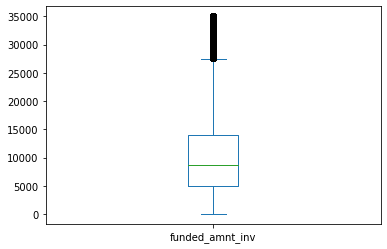

In [22]:
# Plot box plot to understand outliers in continuous variables column 'funded_amnt_inv'
df_loan.funded_amnt_inv.plot.box()

#Analysis: funded_amnt_inv> ~270000 are outliers as per box plot but they are relavant in this case study

<AxesSubplot:>

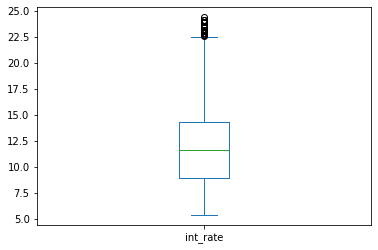

In [23]:
# Plot box plot to understand outliers in column 'int_rate'
df_loan.int_rate.plot.box()

#Analysis: int_rate>22.5 are outliers as per box plot but they are relavant in this case as high int_rate may
# show trends in becoming default

<AxesSubplot:>

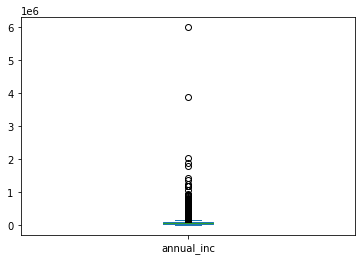

In [24]:
# Plot box plot to understand outliers in column 'annual_inc'
df_loan.annual_inc.plot.box()

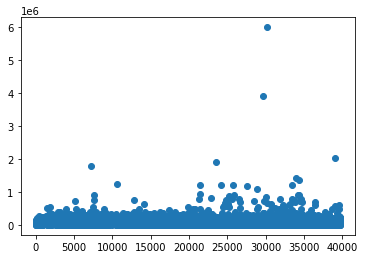

In [25]:
# Plot scatter plot to understand outliers in column 'annual_inc' as box plot wasn't helpful
plt.scatter(df_loan.index,df_loan.annual_inc )

In [26]:
# As it is visible that most of the borrower annual income is within 15,000,00. Try checking 95% and 99% of data
# also to decide on removing ouliers
df_loan[df_loan.annual_inc > 1500000]

# Only 5/39717 borrowers has income more than 1500000

,id,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,acc_now_delinq,term_in_months
7247,884755,12000.00000,14.27,412.57,C,C2,10+ years,RENT,1782000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,NY,1.31,0,9,0,0,36
23551,611872,1500.00000,6.17,45.75,A,A3,5 years,MORTGAGE,1900000.0,Source Verified,Nov-10,Fully Paid,credit_card,TX,0.57,2,17,0,0,36
29639,519954,11430.00082,10.62,334.08,B,B3,3 years,MORTGAGE,3900000.0,Not Verified,Jun-10,Fully Paid,home_improvement,NM,0.20,3,12,0,0,60
30107,513542,5000.00000,12.73,167.84,C,C1,10+ years,MORTGAGE,6000000.0,Source Verified,May-10,Fully Paid,home_improvement,CA,0.01,1,2,0,0,36
39089,269818,3747.00000,12.29,281.84,C,C5,< 1 year,RENT,2039784.0,Not Verified,Mar-08,Fully Paid,debt_consolidation,FL,0.13,1,7,0,0,36


In [31]:
# Hence borrower with annual income more than 15,000,00 can be treated as ouliers and removed from our analysis.
df_loan = df_loan[df_loan.annual_inc < 1500000]
df_loan.shape

(38572, 20)

#### Data Imputation

In [32]:
# Check how many columns have null values
(df_loan.isnull().sum()>0).sum()

0

In [33]:
# Check columns which have null values
df_loan.isnull().sum()>0

id                     False
funded_amnt_inv        False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
verification_status    False
issue_d                False
loan_status            False
purpose                False
addr_state             False
dti                    False
inq_last_6mths         False
open_acc               False
pub_rec                False
acc_now_delinq         False
term_in_months         False
dtype: bool

In [34]:
# Replace NA with most appropriate value for that column
# In case of emp_length, its better to replace with 0
df_loan.emp_length.fillna(0,inplace = True)


### 5. Data Analysis

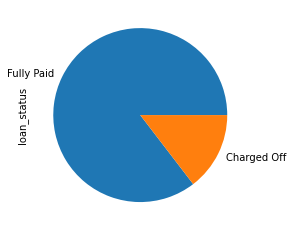

In [35]:
#Understand the distrinution of Fully Paid vs Charged Off loans
df_loan.loan_status.value_counts().plot.pie()
plt.show()

In [36]:
# Split data based on loan status 
df_def = df_loan[(df_loan.loan_status =='Charged Off')]
df_paid = df_loan[(df_loan.loan_status =='Fully Paid')]

#### Analysis 1

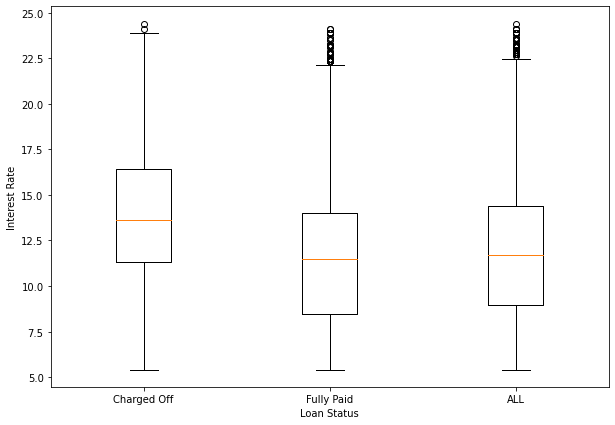

In [33]:
plt.figure(figsize=(10,7))
plt.boxplot([df_def.int_rate,df_paid.int_rate,df_loan.int_rate], labels = ['Charged Off','Fully Paid','ALL'])
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')                                                                                                                                             
plt.show()

# 75% of the loans with interest rate within 14% are better performing or fully paid.
# 50% or 1/2 of the loans with interest rate higher than 14% are charged off. This is huge number as almost
# half of the loans are getting defaulted above 14%.
# Conclusion
# Loans with interest rates upto 14% are better performing and have lower chances of becoming default. 


#### Analysis 2

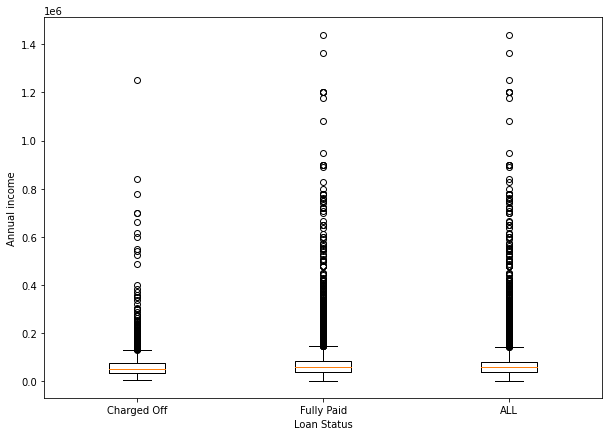

In [37]:
plt.figure(figsize=(10,7))
plt.boxplot([df_def.annual_inc,df_paid.annual_inc,df_loan.annual_inc], labels = ['Charged Off','Fully Paid','ALL'])
plt.xlabel('Loan Status')
plt.ylabel('Annual income')                                                                                                                                             
plt.show()

# Analysis: Annual income of borrower doesn't have significant impact on loan status

#### Analysis 3

<Figure size 720x504 with 0 Axes>

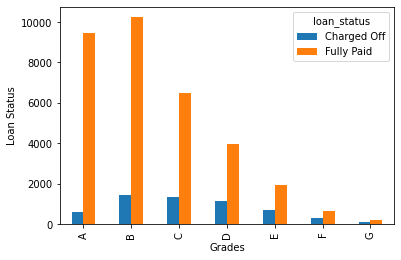

In [38]:
# Check what is the impact of 'grade' in contributing towards default loan
plt.figure(figsize =  [10,7])
df_loan.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel = "Loan Status")
plt.xlabel('Grades')
plt.show()

# Analysis: Grade B has highest defaults and G has lowest % of default loans but pattern doesn't show strong 
# obervation to conclude anything.

#### Analysis 4

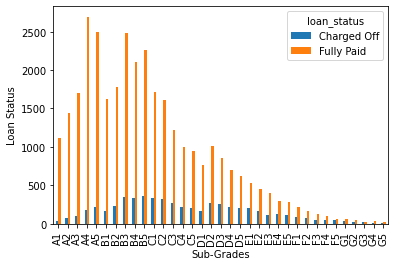

In [39]:
# Check what is the impact of 'sub_grade' in contributing towards default loan

df_loan.groupby('sub_grade')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel = "Loan Status")
plt.xlabel('Sub-Grades')
plt.show()
# Analysis Result: Sub Grade B3,B4,B5, C1 and C2 has highest defaults and G5 has lowest % of default loans but pattern doesn't show strong 
# obervation to conclude anything.

#### Analysis 5

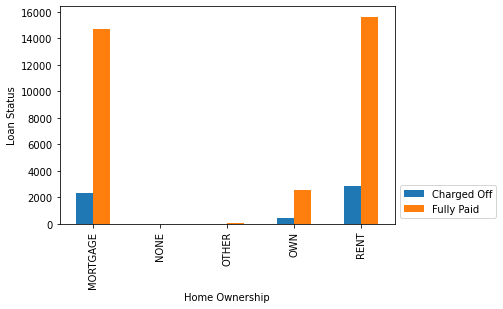

In [40]:
# Check if home_ownership has any impact on loan status

df_loan.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel = "Loan Status")
plt.xlabel('Home Ownership')
plt.legend(bbox_to_anchor = (1,0.2))
plt.show()
# Analysis Result: Loans for which borrower has morgaged or rented house are more likely to default.

#### Analysis 6

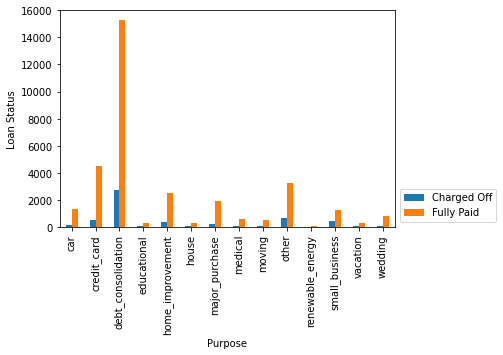

In [41]:
# Check if purpose of loan has any impact on loan status

df_loan.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel = "Loan Status")
plt.xlabel('Purpose')
plt.legend(bbox_to_anchor = (1,0.2))
plt.show()
# Analysis Result: Purpose for which loan has been taken is maximum for debt consilidation.
# However it can not be concluded that debt consilidaiton is one of the reason behind loan getting charged off.

#### Analysis 6

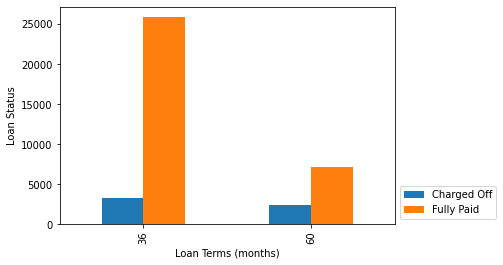

In [42]:
# Check if purpose of loan has any impact on loan status

df_loan.groupby('term_in_months')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel = "Loan Status")
plt.xlabel('Loan Terms (months)')
plt.legend(bbox_to_anchor = (1,0.2))
plt.show()

#Analysis: It is visible from the graph that percentage of default loan in 60month tenure is more as compared to 36 month tenure.
# Before coming to any conclusion, lets calculate of percentage of default loans within terms category.

In [43]:
# Calculate percentage of charged off loans in 60 month term
total_loan_60month = len(df_loan[df_loan.term_in_months == 60].index)
total_chargedOff_loan_60month = len(df_loan[(df_loan.term_in_months == 60) & (df_loan.loan_status == 'Charged Off')].index)
Percentage_Default_Loans_60month = (total_chargedOff_loan_60month/total_loan_60month)*100
Percentage_Default_Loans_60month

#Analysis
#   Almost 25% of the loans taken for 60 months tenure are charged off i.e. 1 out of 4 loans taken for 60 months tenure are
#   likely to default.

25.31645569620253

In [45]:
# Calculate percentage of charged off loans in 36 month term
total_loan_36month = len(df_loan[df_loan.term_in_months == 36].index)
total_chargedOff_loan_36month = len(df_loan[(df_loan.term_in_months == 36) & (df_loan.loan_status == 'Charged Off')].index)
Percentage_Default_Loans_36month = (total_chargedOff_loan_36month/total_loan_36month)*100
Percentage_Default_Loans_36month

Ratio = Percentage_Default_Loans_60month/Percentage_Default_Loans_36month
print(Ratio)

#Analysis
# Chances of loan getting charged off in twice in 60 months as compared to 36 months tenure loan.

2.2823251599439853


#### Analysis 7

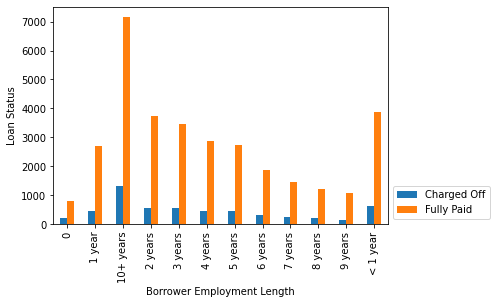

In [46]:
# Check if emp_length has any impact on loan status

df_loan.groupby('emp_length')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel = "Loan Status")
plt.xlabel('Borrower Employment Length')
plt.legend(bbox_to_anchor = (1,0.2))
plt.show()
#Conclusion: No clear pattern observed.

#### Analysis 8

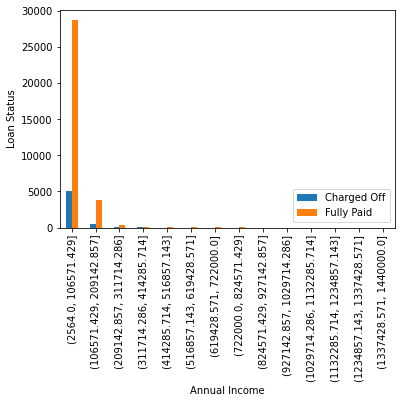

In [49]:
# Binning on annual income
df_loan['annual_inc_cat'] = pd.cut(df_loan.annual_inc,14)
df_loan.groupby('annual_inc_cat')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel = "Loan Status")
plt.xlabel('Annual Income')
plt.legend(bbox_to_anchor = (1,0.2))
plt.show()

# Analysis
# No pattern observed to conclude anything.

#### Analysis 9

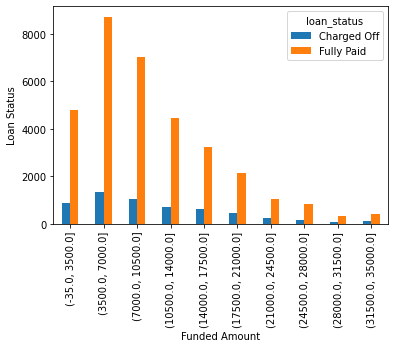

In [45]:
# Binning on Funded amount
df_loan['funded_amnt_cat'] = pd.cut(df_loan.funded_amnt_inv,10)
df_loan.groupby('funded_amnt_cat')['loan_status'].value_counts().unstack().plot(kind='bar',ylabel = "Loan Status")
plt.xlabel('Funded Amount')
plt.show()
#Conclusion: No clear pattern observed.